## Intital notes
1. Using the Health, Nutrition and Population Data and Statistics (HealthStats) from World Bank to explore patterns in infant mortality and under-5 mortality by country, region and in the context of the UN Millenium Goal to reduce childhood mortality by 2/3 in 2015
http://data.worldbank.org/data-catalog/health-nutrition-and-population-statistics


## Questions of interest:
1. How has the rate of infant/childhood mortality changed by country since the UN Millennium Goals declaration of 2000 (compare rates in years before and after 2000)- where the rates already dropping? how has it changed?
2. Which countries rates are not meeting the 2/3 reduction in mortality mandated by the UN Millenium Goals? Which countries have had a large reduction in childhood mortality between 1990 and 2015
    -Remove countries with already low mortality rates
    -Divide 1990 values from 2015
    -Find effective way to plot results (is there a way to output a table?)
3. How do the rate compare regionally? How do they vary depending on Lower, Middle, High income
4. Identify countries with high childhood/infant mortality (beyond 2 standard deviations?)
5. Identify countries with high variance in mortality between years
6. Are there countries where infant to under-5 mortality aren't strongly correlated?

In [163]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [164]:
df = pd.read_csv('data.csv')

In [311]:
# Process the data to remove null values

# Count the number of values per row
for record in df:
  df['full_count'] = df.count(axis=1, level=None, numeric_only=False)
  
# Create a new Data Frame that only includes rows with >60 values and values for countries - not regional
df2 = df.ix[14145:, :]
df3 = df2.ix[lambda df2: df2['full_count'] > 60]

# Create a new Data frame that only includes indicators for Mortality rate under 5 and mortality rate infant
indicatorsInclude = ['Mortality rate, under-5 (per 1,000)', 'Mortality rate, infant (per 1,000 live births)']
df_mortality = df3.ix[lambda df3: df3['Indicator Name'].isin(indicatorsInclude),:]

df_under_5 = df3.ix[lambda df3: df3['Indicator Name'] == 'Mortality rate, under-5 (per 1,000)', :]
df_infant_mortality = df3.ix[lambda df3: df3['Indicator Name'] == 'Mortality rate, infant (per 1,000) live births)', :]

# Get regional data only
df4 = df.ix[:14144, :]
df_regional = df4.ix[lambda df: df['full_count'] >60]
df_regional_under_5 = df_regional.ix[lambda df_regional: df_regional['Indicator Name'] == 'Mortality rate, under-5 (per 1,000)',:]
df_regional_infant_mortality = df_regional.ix[lambda df_regional: df_regional['Indicator Name'] == 'Mortality rate, infant (per 1,000 live births)',:]



In [312]:
# Summary Statistics - Central Tendency

mean_child_mortality_1990 = df_under_5['1990'].mean()
median_child_mortality_1990 = np.median(df_under_5['1990'])
#mode_child_mortality_1990 = statistics.mode(df_under_5['1990'])
(values, counts) = np.unique(df_under_5['1990'], return_counts=True)
ind = np.argmax(counts)
mode_child_mortality_1990 = values[ind]


print("Mean Child Mortality in 1990:", mean_child_mortality_1990)
print("Median Child Mortality in 1990:", median_child_mortality_1990)
print("Mode Child Mortality in 1990", mode_child_mortality_1990)

mean_child_mortality_2015 = df_under_5['2015'].mean()
median_child_mortality_2015 = np.median(df_under_5['2015'])
(values2, counts2) = np.unique(df_under_5['2015'], return_counts=True)
ind = np.argmax(counts2)
mode_child_mortality_2015 = values2[ind]

print("Mean Child Mortality in 2015:", mean_child_mortality_2015)
print("Median Child Mortality in 2015", median_child_mortality_2015)
print("Mode Child Mortality in 2015", mode_child_mortality_2015)

Mean Child Mortality in 1990: 65.00714285714285
Median Child Mortality in 1990: 40.65
Mode Child Mortality in 1990 8.3
Mean Child Mortality in 2015: 29.915306122448975
Median Child Mortality in 2015 19.15
Mode Child Mortality in 2015 3.5


In [174]:
## Summary Statistics - Variance

var_child_mortality_1990 = np.var(df_under_5['1990'])
std_child_mortality_1990 = np.std(df_under_5['1990'], ddof=1)
print("Variance Child Mortality in 1990:", var_child_mortality_1990)
print("Standard Deviation Child Mortality in 2015", std_child_mortality_1990)

var_child_mortality_2015 = np.var(df_under_5['2015'])
std_child_mortality_2015 = np.std(df_under_5['2015'], ddof=1)
print("Variance Child Mortality in 2015:",var_child_mortality_2015)
print("Standard Deviation Child Mortality in 2015:", std_child_mortality_2015)

Variance Child Mortality in 1990: 3751.633316326529
Standard Deviation Child Mortality in 2015 61.56549316340775
Variance Child Mortality in 2015: 871.0739493960848
Standard Deviation Child Mortality in 2015: 29.665705675144352


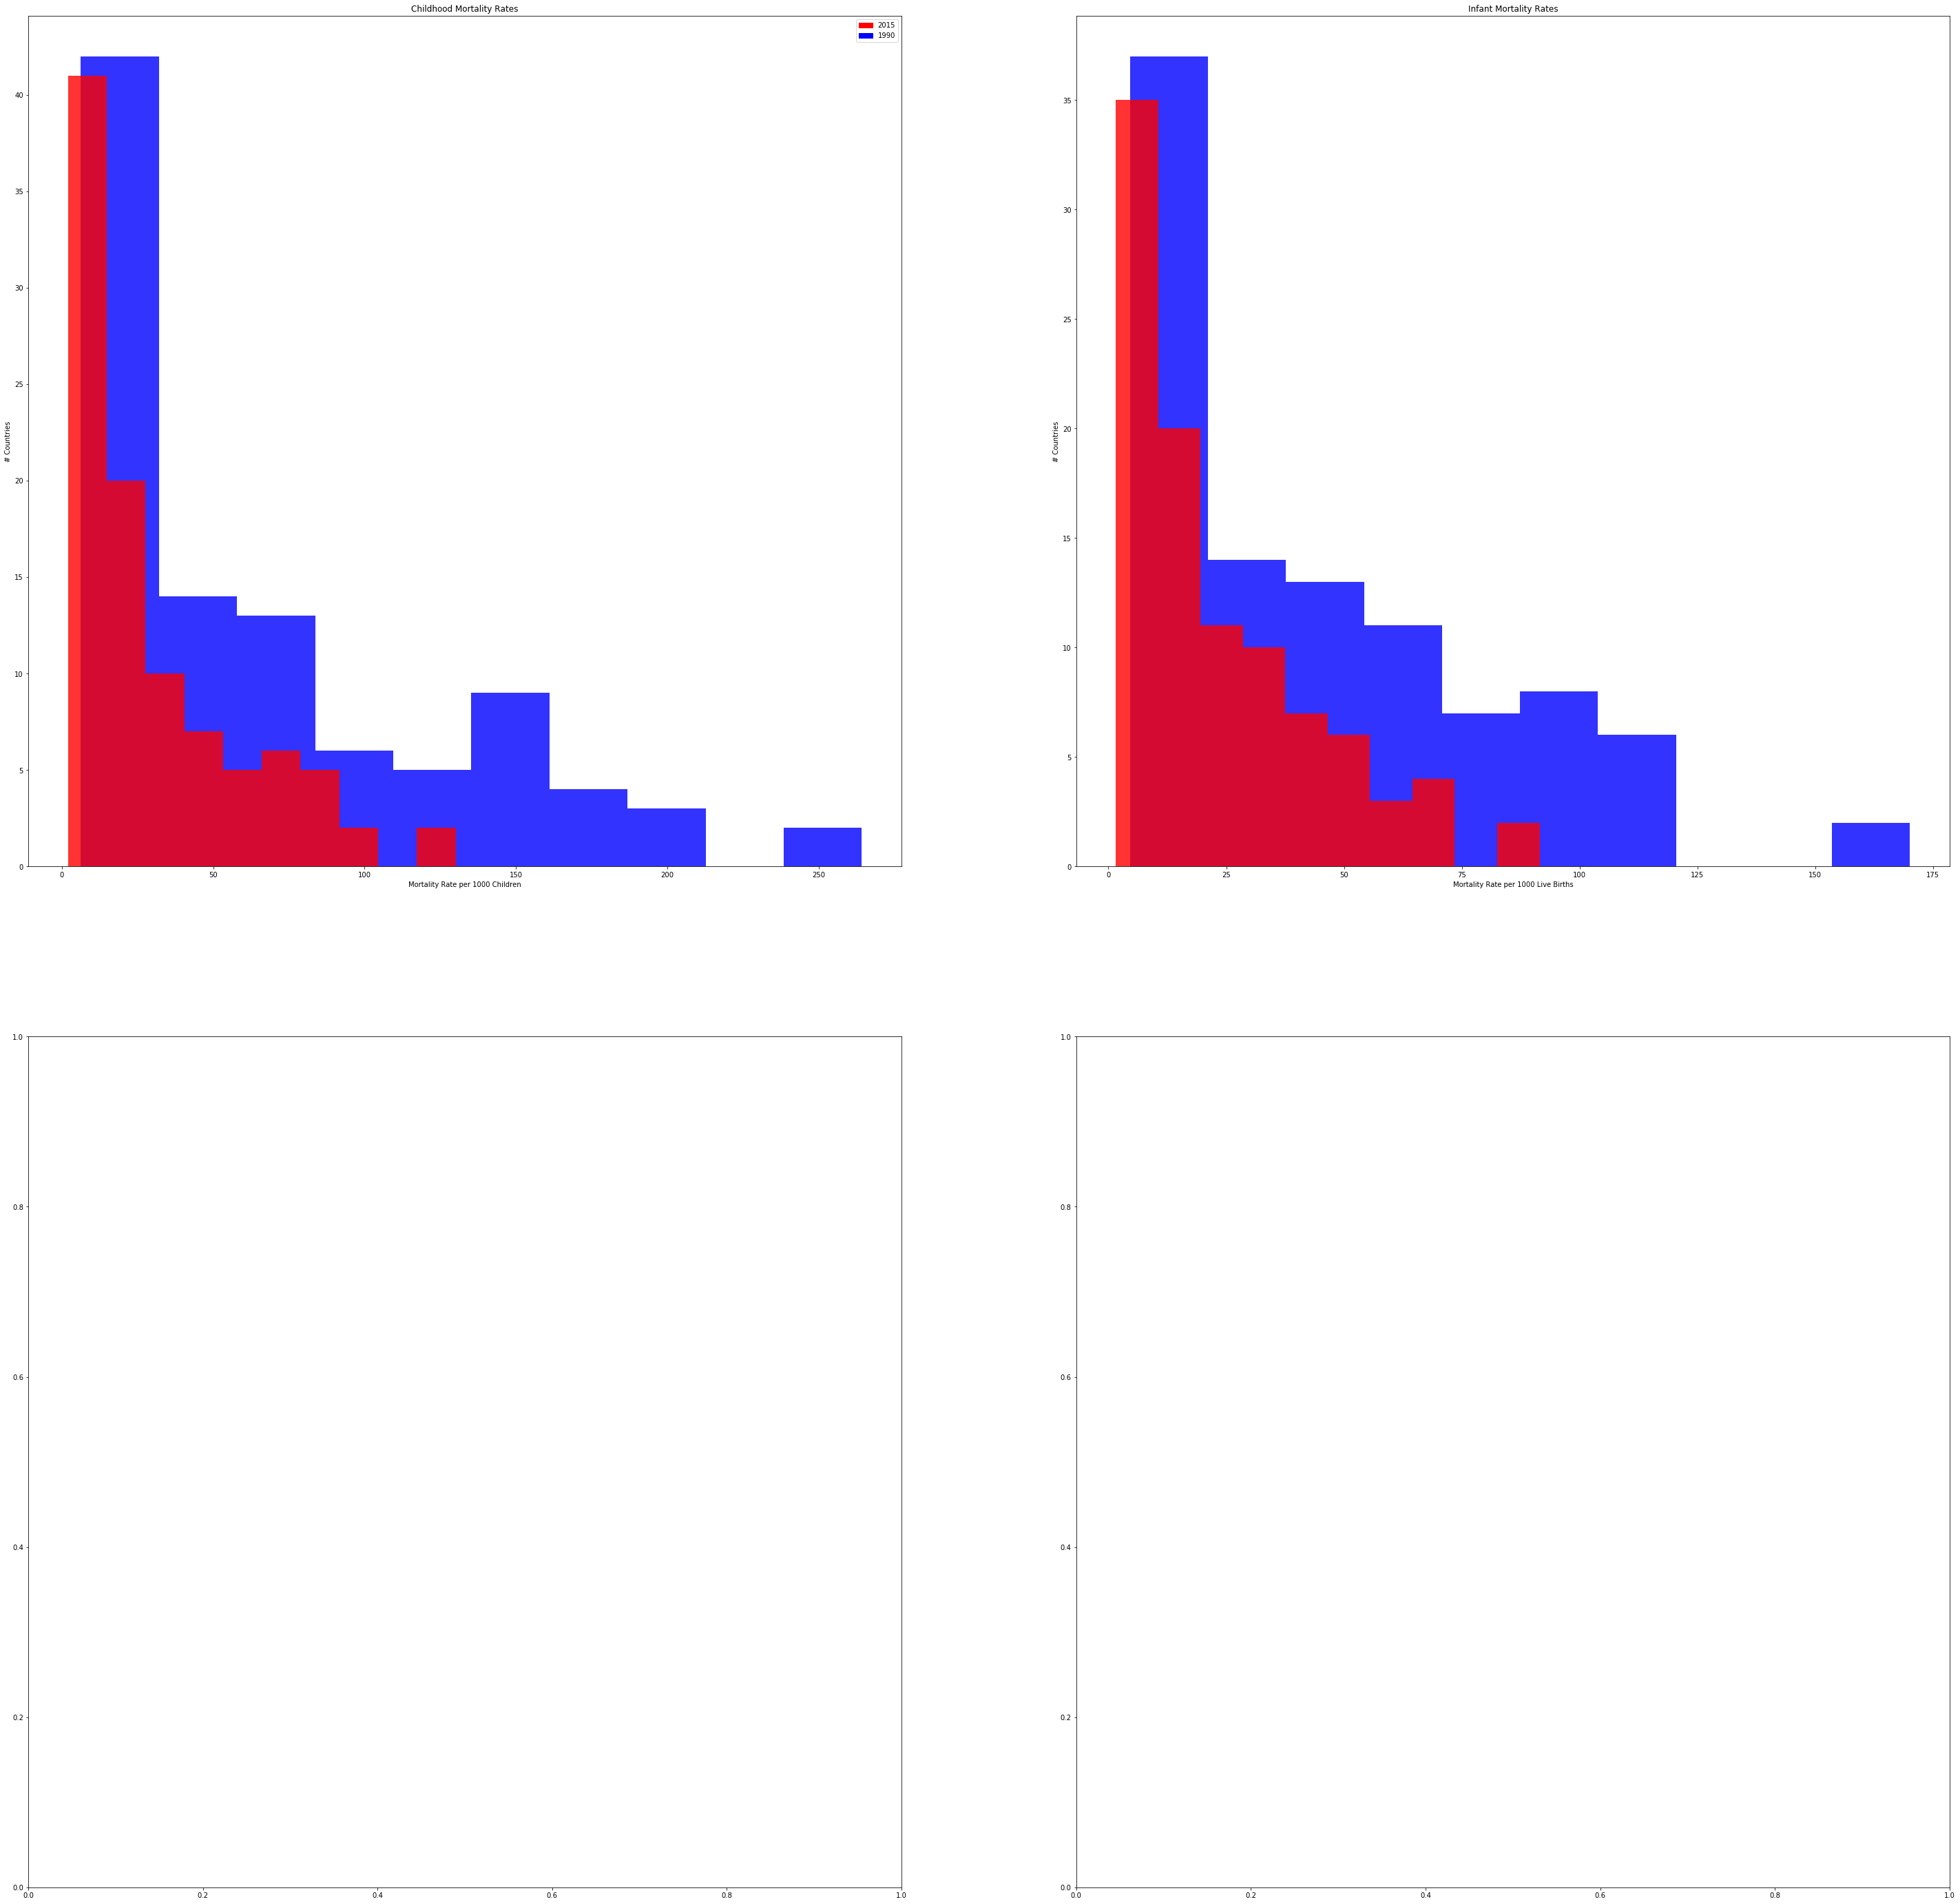

In [268]:
plt.figure(figsize=(50,50))

plt.subplot(2,2,1)
plt.hist(x = df_under_5['1990'],color='blue', alpha=0.8)
plt.ylabel('# Countries')
plt.xlabel('Mortality Rate per 1000 Children')

plt.hist(x = df_under_5['2015'],color='red', alpha=0.8)
plt.title('Childhood Mortality Rates')

blue_patch = mpatches.Patch(color='blue', label='1990')
red_patch = mpatches.Patch(color='red', label='2015')

plt.legend(handles=[red_patch,blue_patch])

plt.subplot(2,2,2)
plt.hist(x = df_infant_mortality['1990'],color='blue', alpha=0.8)
plt.title('Infant Mortality Rates')
plt.ylabel('# Countries')
plt.xlabel('Mortality Rate per 1000 Live Births')

plt.hist(x = df_infant_mortality['2015'],color='red', alpha=0.8)
blue_patch = mpatches.Patch(color='blue', label='1990')
red_patch = mpatches.Patch(color='red', label='2015')

plt.subplot(2,2,3)
plt.subplot(2,2,4)



## Which countries are not meeting the Millenium Goals

1. Remove countries with already low mortality rates
2. Divide 1990 values from 2015
3. Plot scatter with a line demarcation for 2/3 reduction

C:\Users\stace\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\stace\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


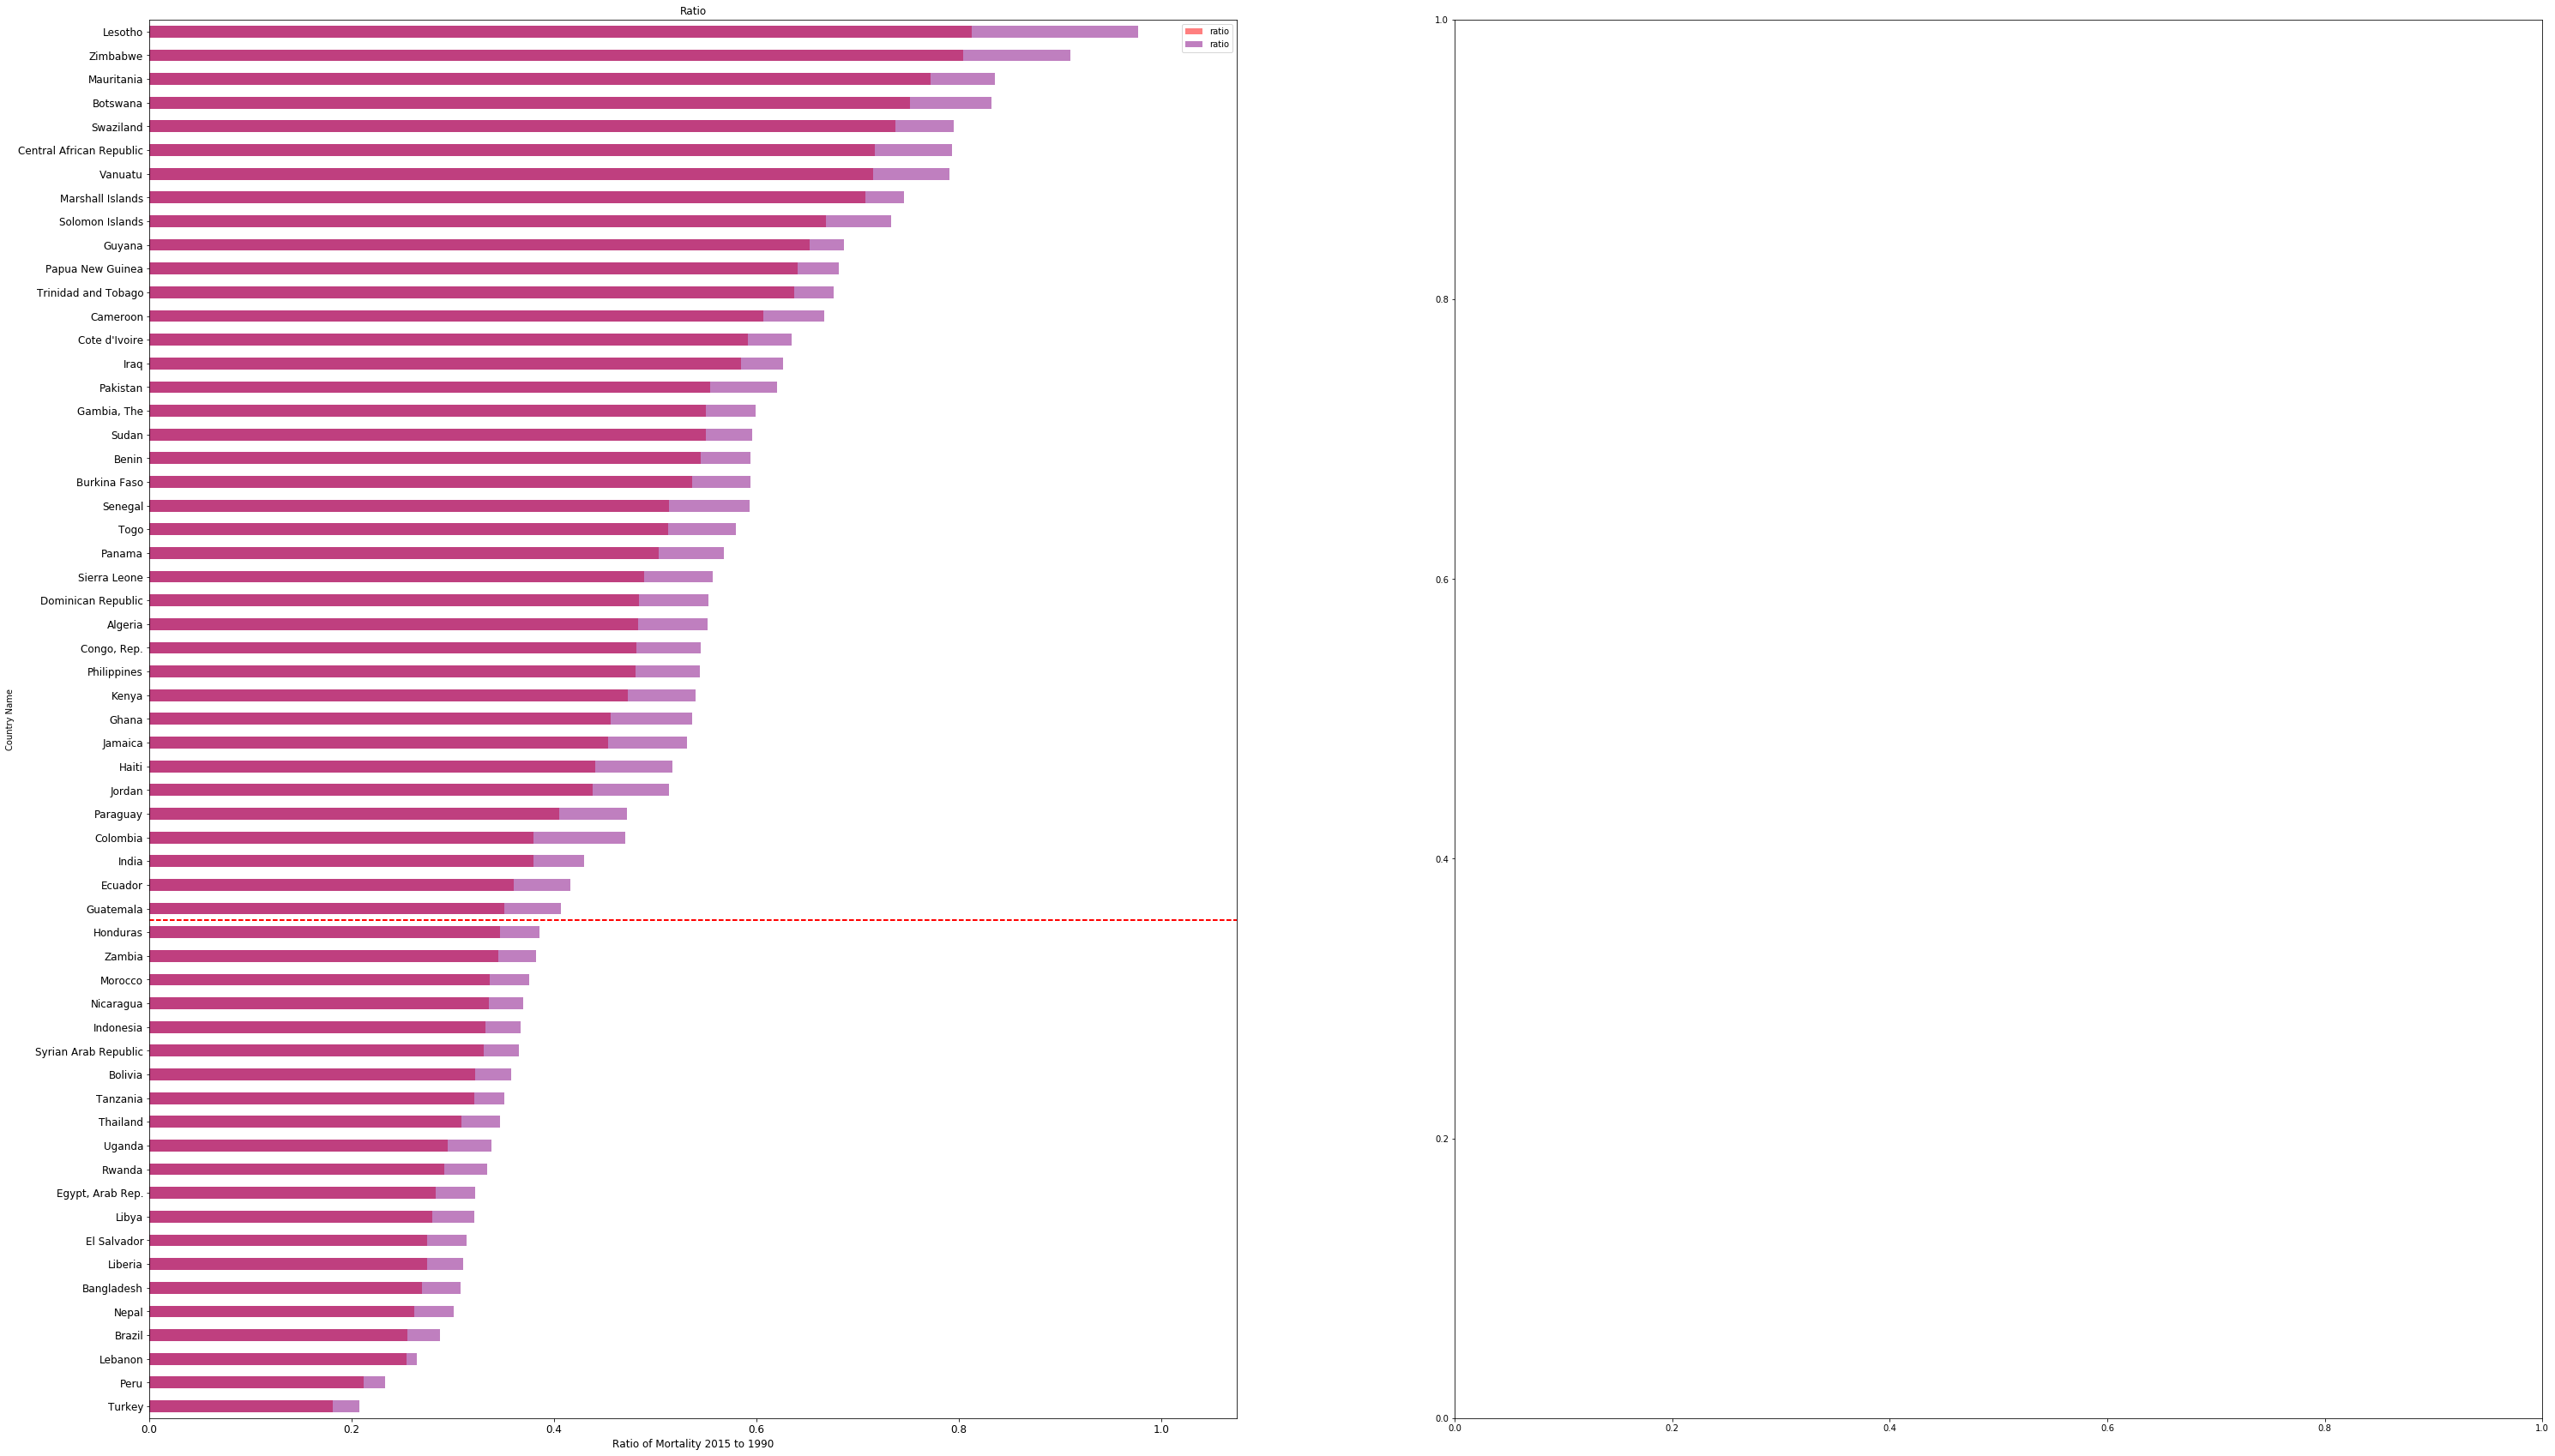

In [318]:
#Removing countries that had low under_5 and infant mortality in 1990
df_high_mortality = df_mortality.ix[lambda df_mortality: df_mortality['1990']  > 25]
#df_high_infant_mortality = df_infant_mortality.ix[lambda df_infant_mortality: df_infant_mortality['1990'] > 25]


#Calculate the reduced mortality between 1990 and 2015
df_high_mortality['ratio'] = df_high_mortality['2015'] / df_high_mortality['1990']
#df_high_infant_mortality['ratio2'] = df_high_infant_mortality['2015'] / df_high_infant_mortality['1990']
df_high_mortality.index = df_high_mortality['Country Name']

#print(df_high_infant_mortality['Country Name'], df_high_infant_mortality['ratio'])

#Sort by ratio value
df_sorted_mort = df_high_mortality.sort(['ratio'], ascending=[1])
df_sorted_mort_5 = df_sorted_mort.ix[lambda df: df_sorted_mort['Indicator Name'] == 'Mortality rate, under-5 (per 1,000)',:]
df_sorted_mort_infant = df_sorted_mort.ix[lambda df: df_sorted_mort['Indicator Name'] == 'Mortality rate, infant (per 1,000 live births)',:]

#df_sorted_infant = df_high_infant_mortality.sort(['ratio2'], ascending=[1])
#df_sorted_infant.index = df_sorted_infant['Country Name']
#df_infant_ratio = df_high_infant_mortality.ix[:, ['Country Name','ratio2']]

#df_infant_ratio.merge(df_sorted_mort['ratio'], on='Country Name', how='left')
#print(df_infant_ratio)

plt.figure(figsize=(100,100))

plt.subplot(1,2,1)

ax = df_sorted_mort_5['ratio'].plot(kind='barh', title ="Ratio", figsize=(50, 30), legend=True, fontsize=12, color='red', alpha=0.5)
ax2 = df_sorted_mort_infant['ratio'].plot(kind='barh', title ="Ratio", figsize=(50, 30), legend=True, fontsize=12, color='purple', alpha=0.5)

ax.set_xlabel("Ratio of Mortality 2015 to 1990", fontsize=12)
plt.axhline(y=20.5, linewidth=2, linestyle='dashed',color = 'r')

#Angola, Botswana, Lesotho, Malawi, Mozambique, Namibia, South Africa, Swaziland, Zambia, and Zimbabwe.

plt.subplot(1,2,2)


plt.show()


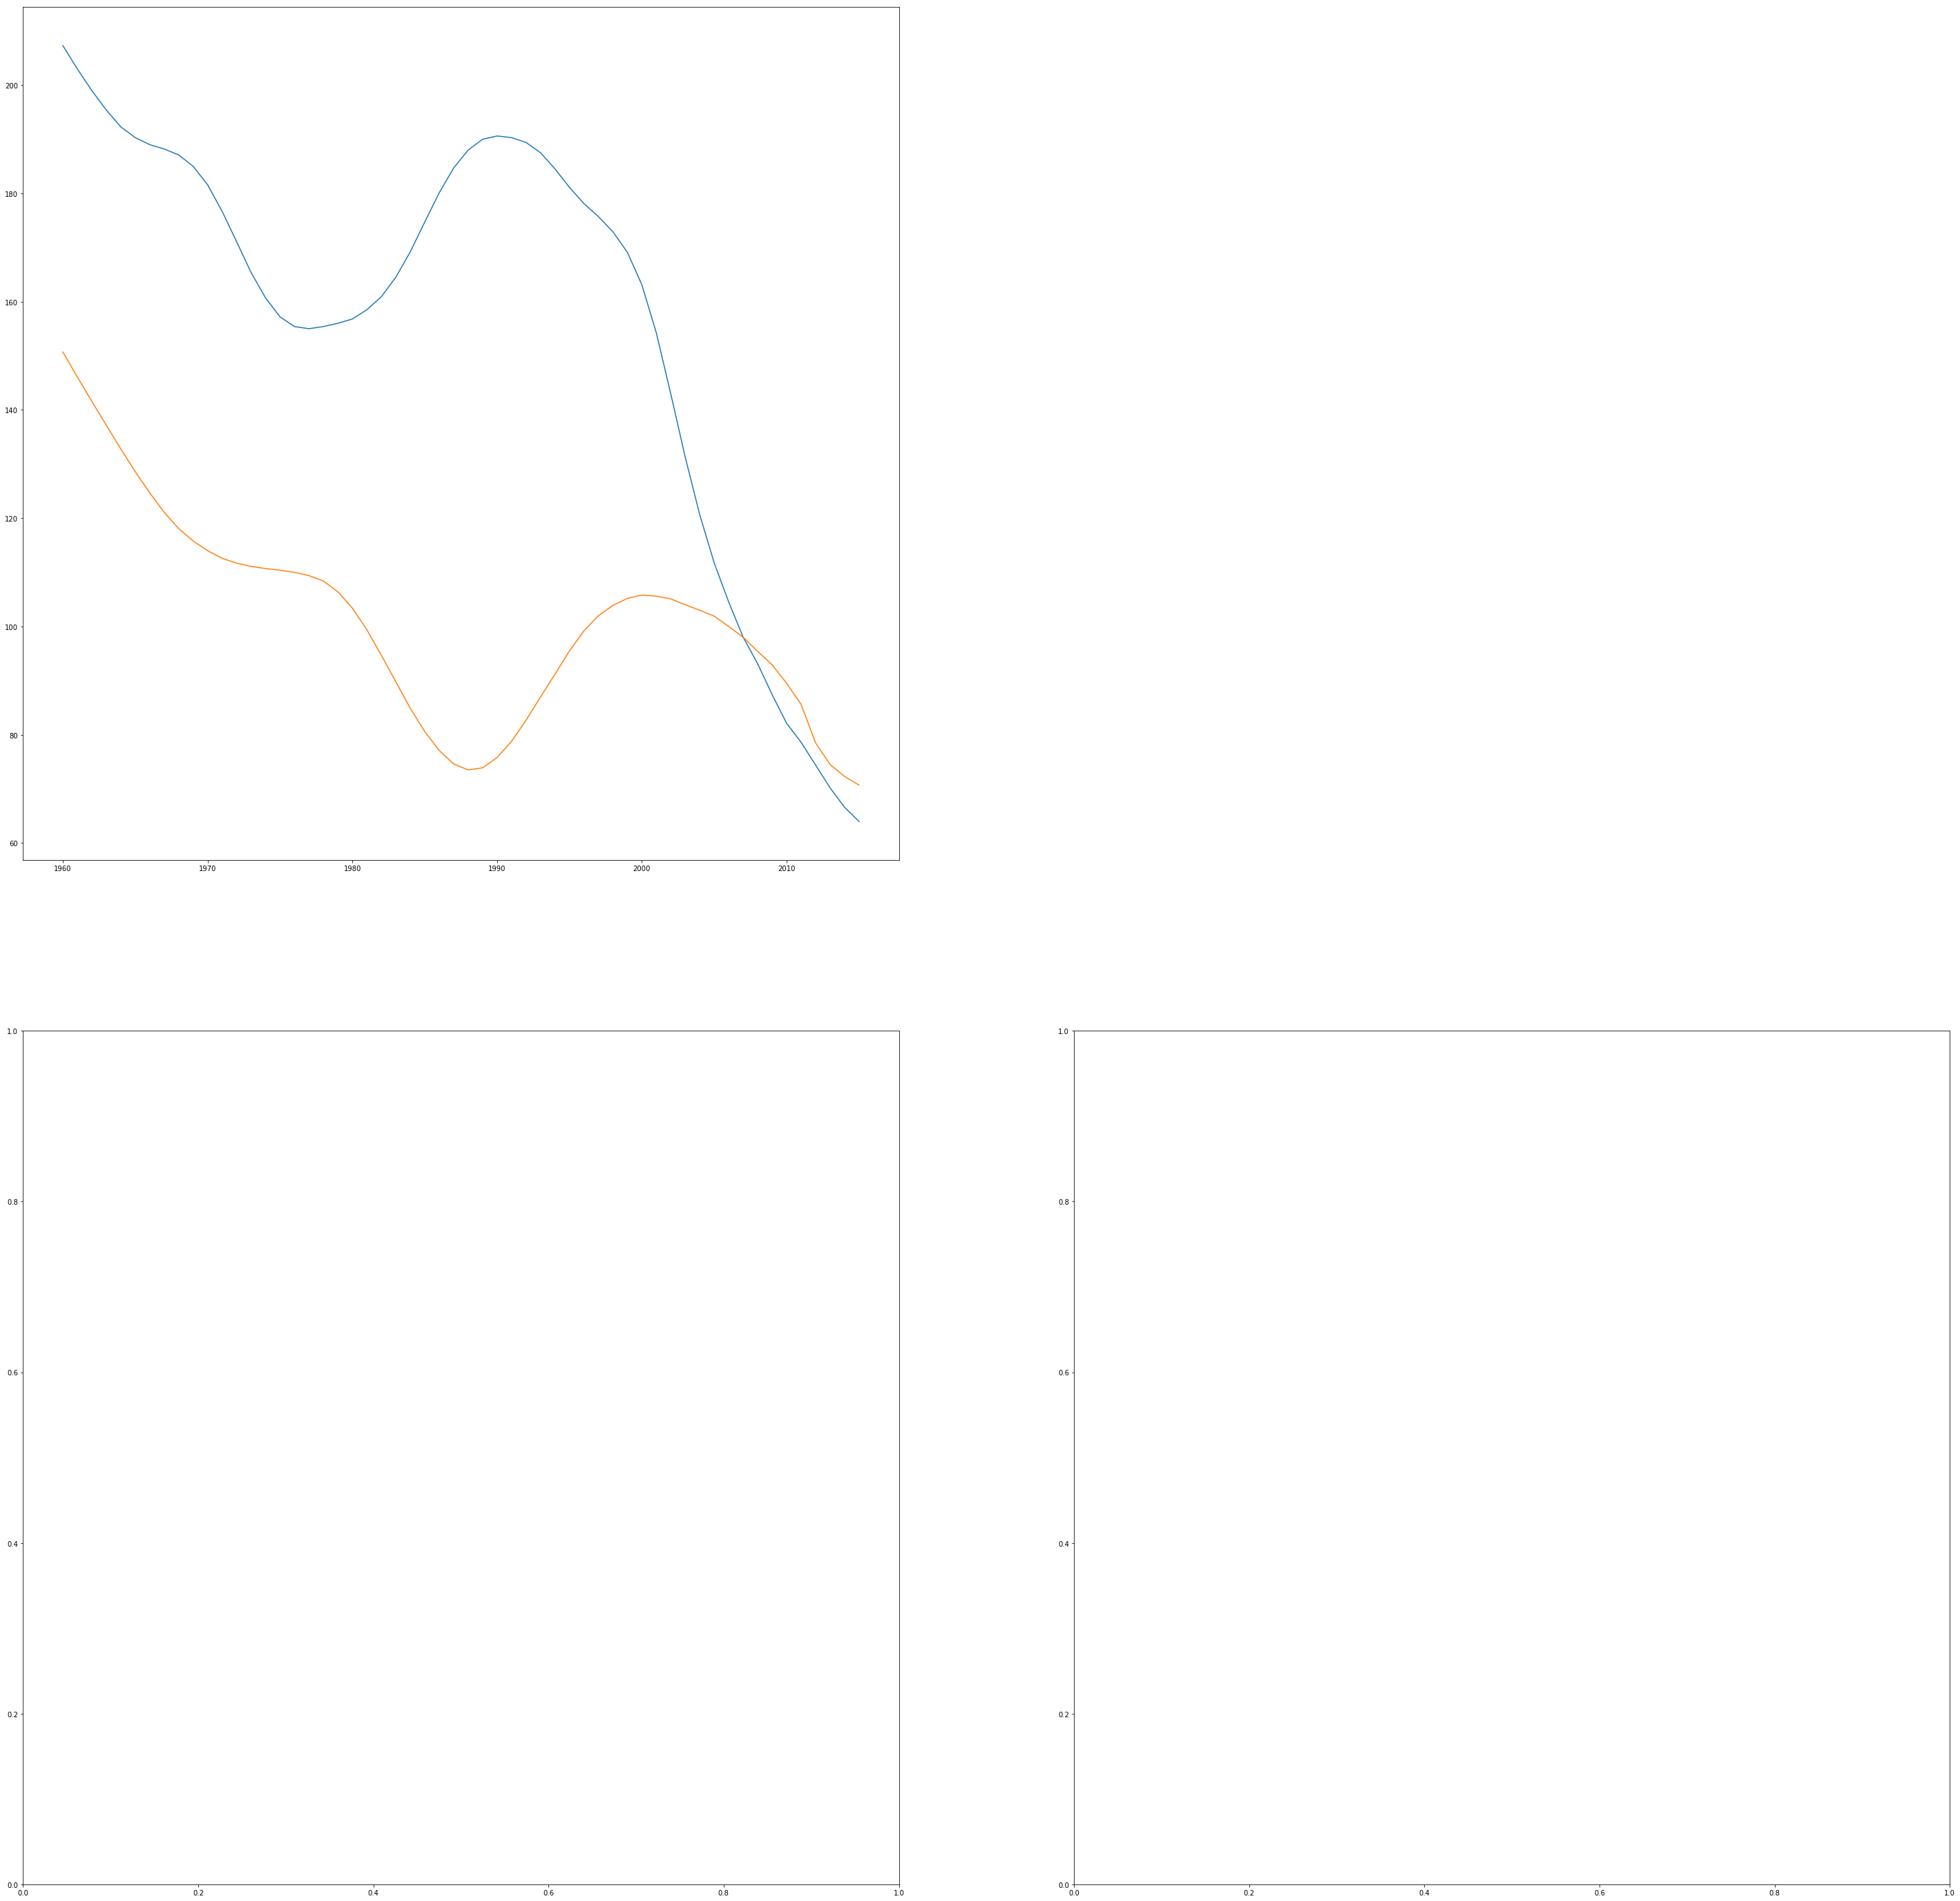

In [356]:
##Is there a significant difference between before and after millenium goals for high middle low What are the mortality rates by region and country wealth -include time series - what is the relative rate of decrease depending on region and country wealth
#print(df_regional_under_5)
#df_regional_infant_mortality 

plt.figure(figsize=(50,50))

plt.subplot(2,2,1)
df_sorted_mort_Zambia = df_sorted_mort_5.ix[lambda df: df_sorted_mort_5['Country Name'] == 'Zambia',:]
df_mort_Zambia = df_sorted_mort_Zambia.drop(['Country Name', 'Indicator Name','Country Code', 'Indicator Code','full_count', 'ratio'], axis=1)
df_sorted_infant_Zambia = df_sorted_mort_infant.ix[lambda df: df_sorted_mort_infant['Country Name'] == 'Zambia',:]
df_infant_Zambia = df_sorted_infant_Zambia.drop(['Country Code', 'Indicator Code','full_count', 'ratio'], axis=1)

df_sorted_mort_Zimbabwe = df_sorted_mort_5.ix[lambda df: df_sorted_mort_5['Country Name'] == 'Zimbabwe',:]
df_mort_Zimbabwe = df_sorted_mort_Zimbabwe.drop(['Country Name', 'Indicator Name','Country Code','Indicator Code','full_count', 'ratio'], axis=1)
df_sorted_infant_Zimbabwe = df_sorted_mort_infant.ix[lambda df: df_sorted_mort_infant['Country Name'] == 'Zimbabwe',:]
df_infant_Zimbabwe = df_sorted_infant_Zimbabwe.drop(['Country Code','Indicator Code','full_count', 'ratio'], axis=1)


df_mort_Zambia2 =df_mort_Zambia.T
df_mort_Zimbabwe2 = df_mort_Zimbabwe.T
plt.plot(df_mort_Zambia2['Zambia'])
plt.plot(df_mort_Zimbabwe2['Zimbabwe'])





plt.subplot(2,2,3)
plt.subplot(2,2,4)



plt.show()
%matplotlib inline

#Plot the rest of the southern african countries to compare

In [337]:
## Trend in Mortality before and after beginning of Milleniu